In [2]:
from Data.load import load
from Architectures.AE import AE
from Visualizations.classifier import plot_confusion_matrix
from tensorflow.keras import layers, models

In [3]:
# Load the data
x_train, y_train, x_test, y_test = load(subdirs=["CN","MCI","AD"],take=30)

# Compress the space
ae = AE.open("Trained Models/AE/300")
x_train = ae.encode(x_train)
x_test = ae.encode(x_test)

Loading AD: 100%|██████████| 26/26 [00:10<00:00,  2.48it/s]


Models loaded and compiled successfully.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


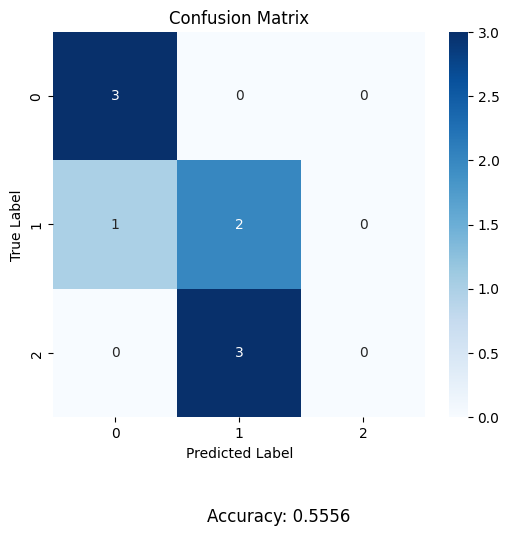

In [4]:
# Train classifier
model = models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Dense(50),
    layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss="mse",optimizer="adam")
model.fit(x_train, y_train, epochs = 50, verbose = False)
y_pred = model.predict(x_test)
plot_confusion_matrix(y_pred, y_test)